<a href="https://colab.research.google.com/github/jmslord/UASNLP/blob/main/knnuasnlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from csv import reader,writer
import operator as op
import string
from sklearn import neighbors

#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

#Read data from corpus
r = reader(open('preprocessed_indonesian.csv','r'))
col_list=['Tweet','HS']
dataset = pd.read_csv("../content/preprocessed_indonesian.csv",usecols=col_list,encoding='latin-1')
dataset = dataset.dropna()
dataset


,Tweet,HS
0,cowok usaha lacak perhati gue lantas remeh per...,1
1,telat tau edan sarap gue gaul cigax jifla cal ...,0
2,kadang pikir percaya tuhan jatuh kali kali kad...,0
3,ku tau mata sipit lihat,0
4,kaum cebong kafir lihat dongok dungu haha,1
...,...,...
13164,bicara ndasmu congor kate anjing,1
13165,kasur enak kunyuk,0
13166,hati hati bisu bosan duh xf xf x xaa,0
13167,bom real mudah deteksi bom kubur dahsyat ledak...,0


In [4]:
abstract_list = []
score_list = []
row_count = 0
for row in list(r)[1:]:
    abstract,score = row[0], row[1]
    if len(abstract.split()) > 0:
      score = float(score)
      score_list.append(score)
      abstract_list.append(abstract)
      row_count = row_count + 1

print("Total processed data: ", row_count)

Total processed data:  13121


In [5]:
vectorizer = TfidfVectorizer()
response = vectorizer.fit_transform(abstract_list)
print(response)
classes = score_list
feature_names = vectorizer.get_feature_names_out()
feature_names

  (0, 1165)	0.20043856798351384
  (0, 1079)	0.3307628539426501
  (0, 5767)	0.18866136775818834
  (0, 5403)	0.17615132531262542
  (0, 9606)	0.2961889537507844
  (0, 6325)	0.284963567189758
  (0, 3863)	0.2641929658844304
  (0, 8762)	0.467544325304394
  (0, 6241)	0.31275642308090484
  (0, 12177)	0.19737144630626074
  (0, 2187)	0.4355434484992407
  (1, 6526)	0.39381248244505895
  (1, 1787)	0.37750040975588856
  (1, 5018)	0.39381248244505895
  (1, 2030)	0.39381248244505895
  (1, 3548)	0.3185089050008047
  (1, 10103)	0.2525411786902222
  (1, 2845)	0.25566138689308465
  (1, 11408)	0.18815454857525168
  (1, 11487)	0.3217290648609238
  (1, 3863)	0.15076202132009714
  (2, 11561)	0.2658655876329197
  (2, 450)	0.16012566130898667
  (2, 6090)	0.15839762994308337
  (2, 8909)	0.1352791936789214
  :	:
  (13116, 523)	0.31569714693972367
  (13116, 1366)	0.31934062479198605
  (13117, 5410)	0.7345680550785934
  (13117, 6174)	0.4801780877192638
  (13117, 3031)	0.47941503578040146
  (13118, 2777)	0.42822924

array(['10', 'aaa', 'aaaa', ..., 'zumiiiii', 'zzzzzz', 'zzzzzzzz'],
      dtype=object)

In [6]:
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(response, classes)
hasil=clf.predict(response)

In [7]:
output_df = pd.DataFrame(data = {'Tweet': dataset['Tweet'], 'Test':dataset['HS'] ,'code': hasil})
output_df['answer'] = np.where(output_df['code']==1, 'HS','NonHS')
print(output_df.head(20))

                                                Tweet  Test  code answer
0   cowok usaha lacak perhati gue lantas remeh per...     1   0.0  NonHS
1   telat tau edan sarap gue gaul cigax jifla cal ...     0   0.0  NonHS
2   kadang pikir percaya tuhan jatuh kali kali kad...     0   0.0  NonHS
3                             ku tau mata sipit lihat     0   0.0  NonHS
4           kaum cebong kafir lihat dongok dungu haha     1   1.0     HS
5   ya bani taplak kawan kawan xf xf x x xf xf x x...     1   1.0     HS
6   deklarasi pilih kepala daerah aman anti hoaks ...     0   0.0  NonHS
7   gue selesai re watch aldnoah zero kampret kara...     0   0.0  NonHS
8   admin belanja po nak makan ais kepal milo ais ...     0   0.0  NonHS
9                                          enak ngewe     0   0.0  NonHS
10           gue jari gue ukur nyali bacot xf xf x xf     1   1.0     HS
11  banci kaleng malu pe anyaan nyungsep koe unifo...     1   1.0     HS
12  ajar ekonomi mesti jago privatisasi hati orang.

In [8]:
from sklearn.metrics import accuracy_score
hasil_accurate = accuracy_score(hasil,dataset['HS'])
print(hasil_accurate)

0.8715036963646063


In [9]:
acc_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    clf = neighbors.KNeighborsClassifier(n_neighbors=K)
    clf.fit(response, classes)
    hasil=clf.predict(response)
    hasil_accurate = accuracy_score(hasil,dataset['HS'])
    acc_val.append(hasil_accurate) #store rmse values
    print('Accuracy Score for k= ' , K , 'is:', hasil_accurate)

Accuracy Score for k=  1 is: 0.9962655285420319
Accuracy Score for k=  2 is: 0.7268500876457588
Accuracy Score for k=  3 is: 0.8715036963646063
Accuracy Score for k=  4 is: 0.8083225363920433
Accuracy Score for k=  5 is: 0.8437619083911287
Accuracy Score for k=  6 is: 0.8167822574498895
Accuracy Score for k=  7 is: 0.8295861595914945
Accuracy Score for k=  8 is: 0.8187638137337093
Accuracy Score for k=  9 is: 0.8215075070497675
Accuracy Score for k=  10 is: 0.8152579833854127


In [47]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(dataset, test_size = 0.3)

x_train = train['Tweet']
x_train = vectorizer.fit_transform(x_train)
y_train = train['HS']

x_test = train['Tweet']
x_test = vectorizer.fit_transform(x_test)
y_test = train['HS']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9184, 10900)
(9184,)
(9184, 10900)
(9184,)


In [ ]:
acc_val1 = [] #to store rmse values for different k
rmse_val=[]
for K in range(10):
    K = K+1
    clf = neighbors.KNeighborsClassifier(n_neighbors=K)
    clf.fit(x_train, y_train)
    hasil=clf.predict(x_test)
    hasil_accurate = accuracy_score(hasil,y_test)
    error = sqrt(mean_squared_error(y_test,hasil)) #calculate rmse
    rmse_val.append(error) #store rmse values
    acc_val1.append(hasil_accurate) #store rmse values
    print('Accuracy Score for k= ' , K , 'is:', hasil_accurate)
    print('RMSE Score for k= ' , K , 'is:', error)

Accuracy Score for k=  1 is: 0.9970601045296167
RMSE Score for k=  1 is: 0.054220802930086485
Accuracy Score for k=  2 is: 0.709168118466899
RMSE Score for k=  2 is: 0.5392883102136565
Accuracy Score for k=  3 is: 0.8695557491289199
RMSE Score for k=  3 is: 0.3611706672351454
Accuracy Score for k=  4 is: 0.8013937282229965
RMSE Score for k=  4 is: 0.44565263577926195
Accuracy Score for k=  5 is: 0.8450566202090593
RMSE Score for k=  5 is: 0.3936284793951535
Accuracy Score for k=  6 is: 0.8197952961672473
RMSE Score for k=  6 is: 0.4245052459425591
Accuracy Score for k=  7 is: 0.82948606271777
RMSE Score for k=  7 is: 0.41293333273329963
Accuracy Score for k=  8 is: 0.814677700348432
RMSE Score for k=  8 is: 0.4304907660468084
Accuracy Score for k=  9 is: 0.820993031358885
RMSE Score for k=  9 is: 0.42309215147661977
Accuracy Score for k=  10 is: 0.8134799651567944
RMSE Score for k=  10 is: 0.43187965319427307


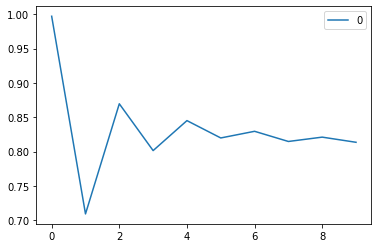

In [ ]:
curve = pd.DataFrame(acc_val1) #elbow curve 
curve.plot()

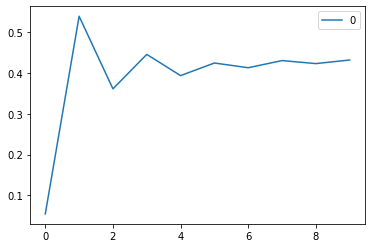

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [32]:
ig=pd.read_excel('DataScrap.xlsx')
ig

,Komen
0,sehat selalu pak Jokowi presiden yg terbaik bu...
1,JANGAN UNTUK HP YA 😂
2,"Liat foto Bapak, saya jadi lupa jualan apa 🤔🤔"
3,"1 minit ,isiin gopay🗿🗿"
4,3 Periode 🔥🔥🔥🔥
5,Inget jangan dipake beli hape kata pakde!
6,Presiden ku keren dekat ma seluruh rakyat 💞
7,Bapak Presiden kita memang luar biasa🔥👍👍👍
8,"Sehat Selalu Ya Ka🖤\n.\n.\n1000F igeh 20K, sed..."
9,Biarin pak beli hp juga kan banyak hikmah ilmu...


In [33]:
komen = []
komen = ig['Komen'].tolist()
print(komen)

['sehat selalu pak Jokowi presiden yg terbaik buat rakyat Indonesia 🇮🇩', 'JANGAN UNTUK HP YA 😂', 'Liat foto Bapak, saya jadi lupa jualan apa 🤔🤔', '1 minit ,isiin gopay🗿🗿', '3 Periode 🔥🔥🔥🔥', 'Inget jangan dipake beli hape kata pakde!', 'Presiden ku keren dekat ma seluruh rakyat 💞', 'Bapak Presiden kita memang luar biasa🔥👍👍👍', 'Sehat Selalu Ya Ka🖤\n.\n.\n1000F igeh 20K, sedia F0lls twiter dan tiktok jugalohhh🖤🖤🖤', 'Biarin pak beli hp juga kan banyak hikmah ilmu yang di dapat,karena ilmu lebih berharga daripada uang.', 'Gerak cepat pak CPO ini gimana pak makin membludak 😭', '😍😍😍😍', 'dikasi uang sama pak jokowi pasti nte bore up motor', 'Pak Iphone', 'Selamat mlm pak,sya kok tidak pernah dapat bantuan ya😂😂😂😂😂', '1000 Followers 20rb nya kk🔥🔥', '🔥🔥🔥🔥🔥', 'jangan untuk depo ya', 'Sehat2 pakde😍🔥❤️', '💜💜Wow! its amazing!💜💜', 'Pak mohon ya pak turunkan harga minyak... Cukuplah 15 rb per liter', 'Waww', 'Gpp buat beli hp juga pak biar bisa jualan online 😂', 'asikquiiee😍', 'Sugeh bgt y pak presiden

In [41]:
responses = vectorizer.fit_transform(komen)
print(responses)

  (0, 85)	0.34504683527633023
  (0, 177)	0.34504683527633023
  (0, 47)	0.3175876670531233
  (0, 209)	0.3837483592096614
  (0, 228)	0.3837483592096614
  (0, 173)	0.2641725065938043
  (0, 95)	0.2962886814707397
  (0, 160)	0.17402392702992295
  (0, 194)	0.27888614311979215
  (0, 188)	0.3175876670531233
  (1, 226)	0.43291096713621674
  (1, 82)	0.520444711931756
  (1, 222)	0.520444711931756
  (1, 93)	0.520444711931756
  (2, 16)	0.37006977077427883
  (2, 96)	0.332747750374973
  (2, 130)	0.37006977077427883
  (2, 92)	0.37006977077427883
  (2, 184)	0.332747750374973
  (2, 29)	0.30626735548561623
  (2, 69)	0.37006977077427883
  (2, 125)	0.37006977077427883
  (3, 72)	0.5773502691896258
  (3, 90)	0.5773502691896258
  (3, 148)	0.5773502691896258
  :	:
  (35, 60)	0.05793264195588816
  (35, 227)	0.23173056782355264
  (35, 97)	0.05793264195588816
  (35, 52)	0.43237916027401363
  (35, 41)	0.06294159641511614
  (35, 129)	0.06294159641511614
  (35, 197)	0.06294159641511614
  (35, 170)	0.0629415964151161

In [42]:
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
hasilig=clf.predict(responses)

ValueError: ignored